In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the datafiles

In [138]:

df1=pd.read_csv("applicant.csv")
df2=pd.read_csv("loan.csv")

## Having a look at the data

In [139]:
df1.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [140]:
df2.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


## UNDERSATNDING THE DATA

In [141]:
df1.shape

(1000, 15)

In [142]:
df1.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)'],
      dtype='object')

In [143]:
df2.shape

(1000, 13)

In [144]:
df2.columns

Index(['loan_application_id', 'applicant_id', 'Months_loan_taken_for',
       'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

## Checking if both the dataframes belong to same corresponding candidate

In [145]:
df1['applicant_id'].unique()

array([1469590, 1203873, 1432761, 1207582, 1674436, 1213971, 1428822,
       1705739, 1715169, 1722991, 1719964, 1818043, 1231297, 1172292,
       1154808, 1648542, 1193245, 1740408, 1250076, 1616625, 1428429,
       1272219, 1771414, 1666563, 1847764, 1138996, 1578742, 1709277,
       1508823, 1323870, 1414851, 1764281, 1291798, 1873969, 1888210,
       1547494, 1674114, 1330233, 1443666, 1574283, 1866940, 1188917,
       1491485, 1381317, 1246402, 1641291, 1716706, 1395153, 1697859,
       1193227, 1850736, 1771270, 1840431, 1502325, 1151072, 1875288,
       1361963, 1599723, 1438784, 1274604, 1548860, 1570047, 1825757,
       1304525, 1750074, 1134752, 1505713, 1724003, 1388519, 1724882,
       1463336, 1804919, 1591747, 1743709, 1472593, 1641977, 1649753,
       1149571, 1691240, 1838961, 1403464, 1646022, 1106801, 1616296,
       1238277, 1175457, 1576577, 1586725, 1660853, 1132472, 1368120,
       1403185, 1601892, 1220273, 1713632, 1416025, 1610826, 1887006,
       1570732, 1617

In [146]:
df2['applicant_id'].unique()

array([1469590, 1203873, 1432761, 1207582, 1674436, 1213971, 1428822,
       1705739, 1715169, 1722991, 1719964, 1818043, 1231297, 1172292,
       1154808, 1648542, 1193245, 1740408, 1250076, 1616625, 1428429,
       1272219, 1771414, 1666563, 1847764, 1138996, 1578742, 1709277,
       1508823, 1323870, 1414851, 1764281, 1291798, 1873969, 1888210,
       1547494, 1674114, 1330233, 1443666, 1574283, 1866940, 1188917,
       1491485, 1381317, 1246402, 1641291, 1716706, 1395153, 1697859,
       1193227, 1850736, 1771270, 1840431, 1502325, 1151072, 1875288,
       1361963, 1599723, 1438784, 1274604, 1548860, 1570047, 1825757,
       1304525, 1750074, 1134752, 1505713, 1724003, 1388519, 1724882,
       1463336, 1804919, 1591747, 1743709, 1472593, 1641977, 1649753,
       1149571, 1691240, 1838961, 1403464, 1646022, 1106801, 1616296,
       1238277, 1175457, 1576577, 1586725, 1660853, 1132472, 1368120,
       1403185, 1601892, 1220273, 1713632, 1416025, 1610826, 1887006,
       1570732, 1617

In [147]:
c=0
for i in range(1000):
    if df1['applicant_id'].unique()[i]==df2['applicant_id'].unique()[i]:
               c+=1
            
print(c)

1000


### Since both the dataframes have same corresponding 'applicant_id', they can be combined later

# Analyzing the data

In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [149]:
df1.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000


In [150]:
df1.isnull().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
dtype: int64

## Dealing with NULL values

In [151]:
df1.loc[df1['Has_been_employed_for_at_least'].isnull()]

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
9,1722991,28,male,married/widowed,1,own,2,management / self-employed / highly qualified ...,NaN,0 year,NaN,1,Low,0,2 lac
47,1395153,23,female,divorced/separated/married,1,rent,2,unemployed / unskilled - non-resident,NaN,0 year,Registered under the applicant's name,1,High,NaN,0
56,1361963,52,male,single,1,own,1,management / self-employed / highly qualified ...,NaN,0 year,Registered under the applicant's name,1,NaN,0,2 lac
128,1125378,34,male,single,1,own,2,management / self-employed / highly qualified ...,NaN,0 year,Registered under the applicant's name,1,Low,0,2 lac
163,1628583,70,male,single,1,for free,4,management / self-employed / highly qualified ...,NaN,0 year,Registered under the applicant's name,1,Low,0,2 lac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1880388,33,male,single,1,rent,2,management / self-employed / highly qualified ...,NaN,0 year,Registered under the applicant's name,1,Low,NaN,NaN
987,1555553,64,female,divorced/separated/married,1,own,4,skilled employee / official,NaN,0 year,NaN,1,Medium,NaN,NaN
988,1633096,29,male,single,1,for free,2,management / self-employed / highly qualified ...,NaN,0 year,Registered under the applicant's name,1,Low,NaN,0
993,1609685,30,male,single,1,own,3,management / self-employed / highly qualified ...,NaN,0 year,Registered under the applicant's name,1,Low,NaN,0


In [152]:
df1[pd.isnull(df1['Has_been_employed_for_at_least'])]['Has_been_employed_for_at_most'].unique()

array(['0 year'], dtype=object)

In [153]:
df1[pd.isnull(df1['Has_been_employed_for_at_least'])]['Has_been_employed_for_at_most'].count()

62

##### It's been observed that all the 'Has_been_employed_for_at_least' that are null, for those corresponding 'Has_been_employed_for_at_most' are '0 year'

In [154]:
df1['Has_been_employed_for_at_least'].unique()

array(['7 years', '1 year', '4 years', nan, '0 year'], dtype=object)

In [155]:
#fill all the null values with '0 year'
df1['Has_been_employed_for_at_least']=df1['Has_been_employed_for_at_least'].fillna('0 year')

In [156]:
df1['Has_been_employed_for_at_most'].unique()

array([nan, '4 years', '7 years', '0 year', '1 year'], dtype=object)

### Observed that 'Has_been_employed_for_at_most' is not very useful, so drop it

In [157]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [158]:
df1.drop(['Has_been_employed_for_at_most'],axis=1,inplace=True)

In [159]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

### Observed that 'Telephone' is not very useful, so drop it

In [160]:
df1[pd.isnull(df1['Telephone'])]

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,NaN,1,Low,NaN,0
6,1428822,53,male,single,1,own,4,skilled employee / official,7 years,NaN,1,High,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,1365267,34,male,single,2,own,4,unskilled - resident,7 years,NaN,1,Medium,NaN,NaN
992,1237705,23,male,married/widowed,1,rent,4,unskilled - resident,4 years,NaN,1,NaN,NaN,0
995,1880194,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,NaN,1,Low,NaN,NaN
997,1758046,38,male,single,1,own,4,skilled employee / official,7 years,NaN,1,Low,NaN,NaN


In [161]:
df1.drop(['Telephone'],axis=1,inplace=True)

In [162]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [163]:
df1['Savings_account_balance'].unique()

array([nan, 'Low', 'High', 'Very high', 'Medium'], dtype=object)

### It's been noted that not many values are missing. So they're filled with the column mode value.

In [164]:
df1.groupby('Savings_account_balance').count()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Foreign_worker,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
Savings_account_balance,,,,,,,,,,,,
High,63,63,63,63,63,63,63,63,63,63,15,19
Low,603,603,603,603,603,603,603,603,603,603,193,371
Medium,103,103,103,103,103,103,103,103,103,103,52,59
Very high,48,48,48,48,48,48,48,48,48,48,17,20


In [165]:
df1['Savings_account_balance'].fillna(df1['Savings_account_balance'].mode()[0],inplace=True)

In [166]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [167]:
df1['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].unique()

array(['0', '2 lac', nan], dtype=object)

In [168]:
df1['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].unique()

array([nan, '0', '2 lac'], dtype=object)

### For both 'Balance_in_existing_bank_account_(lower_limit_of_bucket)' & 'Balance_in_existing_bank_account_(upper_limit_of_bucket)' we have only 2 unique values. 
### Similarly they can be replaced by their mode value

In [169]:

df1['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].fillna(df1['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].mode()[0],inplace=True)
df1['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].fillna(df1['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].mode()[0],inplace=True)

In [170]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

## df2 analysis

In [171]:
df2.describe()

,applicant_id,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


In [172]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   loan_application_id                          1000 non-null   object
 1   applicant_id                                 1000 non-null   int64 
 2   Months_loan_taken_for                        1000 non-null   int64 
 3   Purpose                                      988 non-null    object
 4   Principal_loan_amount                        1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 6   Property                                     846 non-null    object
 7   Has_coapplicant                              1000 non-null   int64 
 8   Has_guarantor                                1000 non-null   int64 
 9   Other_EMI_plans                              186 non-null    object
 10  Number_of_exi

In [173]:
df2.isnull().sum()

loan_application_id                              0
applicant_id                                     0
Months_loan_taken_for                            0
Purpose                                         12
Principal_loan_amount                            0
EMI_rate_in_percentage_of_disposable_income      0
Property                                       154
Has_coapplicant                                  0
Has_guarantor                                    0
Other_EMI_plans                                814
Number_of_existing_loans_at_this_bank            0
Loan_history                                     0
high_risk_applicant                              0
dtype: int64

### As 'purpose' has very few null values, it is replaced by the mode. Similar is done for 'property'.

In [174]:
df2.groupby('Purpose').count()

,loan_application_id,applicant_id,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
Purpose,,,,,,,,,,,,
FF&E,181,181,181,181,181,163,181,181,33,181,181,181
business,97,97,97,97,97,86,97,97,29,97,97,97
career development,9,9,9,9,9,9,9,9,1,9,9,9
domestic appliances,12,12,12,12,12,11,12,12,1,12,12,12
education,50,50,50,50,50,30,50,50,10,50,50,50
electronic equipment,280,280,280,280,280,256,280,280,46,280,280,280
new vehicle,234,234,234,234,234,194,234,234,39,234,234,234
repair costs,22,22,22,22,22,17,22,22,1,22,22,22
used vehicle,103,103,103,103,103,73,103,103,18,103,103,103


In [175]:
df2.groupby('Property').count()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
Property,,,,,,,,,,,,
building society savings agreement/life insurance,232,232,232,231,232,232,232,232,42,232,232,232
car or other,332,332,332,327,332,332,332,332,64,332,332,332
real estate,282,282,282,281,282,282,282,282,42,282,282,282


In [176]:
df2['Purpose'].fillna(df2['Purpose'].mode()[0],inplace=True)
df2['Property'].fillna(df2['Property'].mode()[0],inplace=True)

### As 'Other EMI plans' have very large NULL values drop it

In [177]:
df2.groupby('Other_EMI_plans').count()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
Other_EMI_plans,,,,,,,,,,,,
bank,139,139,139,139,139,139,139,139,139,139,139,139
stores,47,47,47,47,47,47,47,47,47,47,47,47


In [178]:
df2.drop(['Other_EMI_plans'],axis=1,inplace=True)

In [179]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   loan_application_id                          1000 non-null   object
 1   applicant_id                                 1000 non-null   int64 
 2   Months_loan_taken_for                        1000 non-null   int64 
 3   Purpose                                      1000 non-null   object
 4   Principal_loan_amount                        1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 6   Property                                     1000 non-null   object
 7   Has_coapplicant                              1000 non-null   int64 
 8   Has_guarantor                                1000 non-null   int64 
 9   Number_of_existing_loans_at_this_bank        1000 non-null   int64 
 10  Loan_history 

### AS 'applicant_id' is same in both dataframes, it can be dropped along with 'loan_application_id'

In [180]:
df2.drop(['loan_application_id','applicant_id'],axis=1,inplace=True)

## Joining both the dataframes

In [181]:
frames = [df1, df2]
df = pd.concat(frames,axis=1, join='inner')

In [182]:
df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,1,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,1,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,1,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,1,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,1,...,24,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,1


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [184]:
df.corr()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
applicant_id,1.000000,-0.010583,0.017048,-0.028017,0.066389,0.009359,-0.056669,0.002269,-0.012961,0.011860,-0.038409,-0.029125
Primary_applicant_age_in_years,-0.010583,1.000000,0.118201,0.266419,0.006151,-0.036136,0.032716,0.058266,-0.018357,-0.023923,0.149254,-0.091127
Number_of_dependents,0.017048,0.118201,1.000000,0.042643,-0.077071,-0.023834,0.017142,-0.071207,-0.032817,0.036589,0.109667,-0.003015
Years_at_current_residence,-0.028017,0.266419,0.042643,1.000000,0.054097,0.034067,0.028926,0.049302,0.001623,-0.028334,0.089625,0.002967
Foreign_worker,0.066389,0.006151,-0.077071,0.054097,1.000000,0.138196,0.050050,0.090024,-0.066338,-0.097256,0.009717,0.082079
Months_loan_taken_for,0.009359,-0.036136,-0.023834,0.034067,0.138196,1.000000,0.624984,0.074749,0.029698,-0.039594,-0.011284,0.214927
Principal_loan_amount,-0.056669,0.032716,0.017142,0.028926,0.050050,0.624984,1.000000,-0.271316,0.079076,-0.065237,0.020795,0.154739
EMI_rate_in_percentage_of_disposable_income,0.002269,0.058266,-0.071207,0.049302,0.090024,0.074749,-0.271316,1.000000,-0.013048,-0.006429,0.021669,0.072404
Has_coapplicant,-0.012961,-0.018357,-0.032817,0.001623,-0.066338,0.029698,0.079076,-0.013048,1.000000,-0.048426,-0.006001,0.062728
Has_guarantor,0.011860,-0.023923,0.036589,-0.028334,-0.097256,-0.039594,-0.065237,-0.006429,-0.048426,1.000000,-0.024682,-0.055039


# Visualization and insights

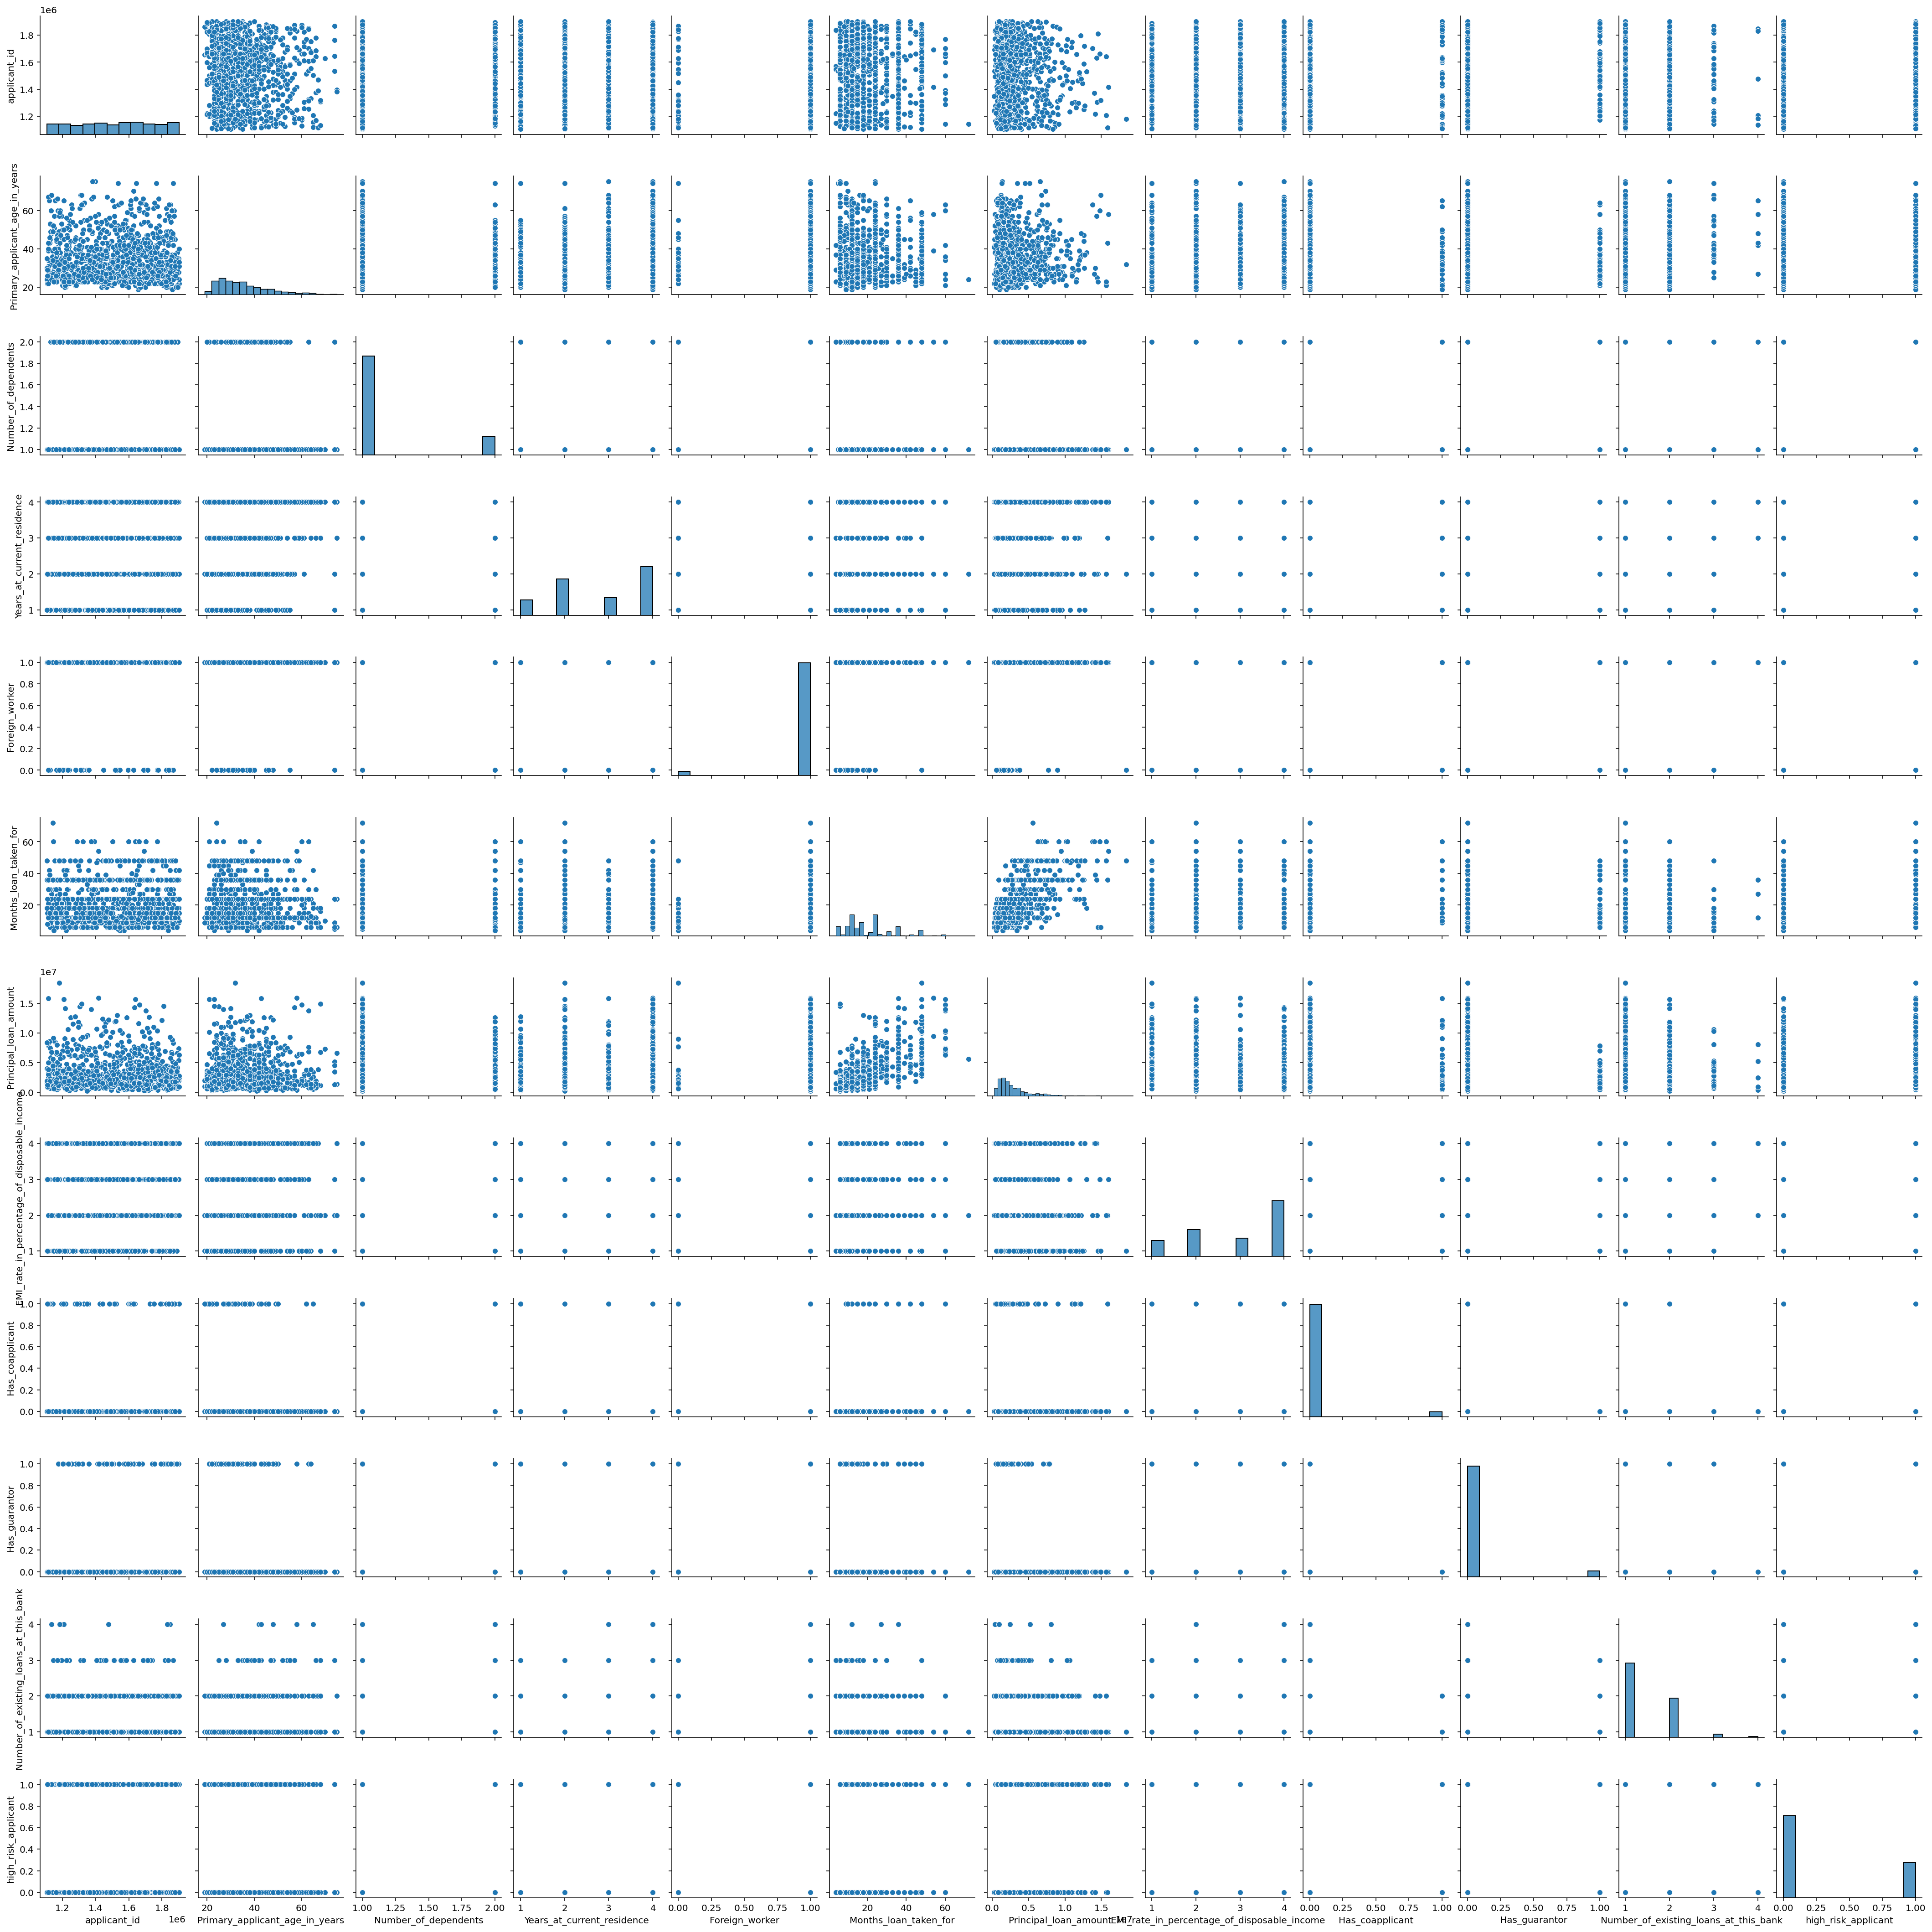

In [185]:
sns.pairplot(df)

### Checkig how many of them are high risk and not high risk, only 300 of the 1000 are marked high risk

In [186]:
df.groupby('high_risk_applicant').count()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Foreign_worker,...,Balance_in_existing_bank_account_(upper_limit_of_bucket),Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history
high_risk_applicant,,,,,,,,,,,,,,,,,,,,,
0,700,700,700,700,700,700,700,700,700,700,...,700,700,700,700,700,700,700,700,700,700
1,300,300,300,300,300,300,300,300,300,300,...,300,300,300,300,300,300,300,300,300,300


### Checking the frequency of each unique type in dataframe for each column

In [187]:
for i in range(1,23):
    print(df.columns[i])
    print('Index - Frequency')
    for j in df.groupby(df.columns[i]).count().index:
        print(str(j)+' - '+str(df.groupby(df.columns[i]).count()['applicant_id'][j]))

Primary_applicant_age_in_years
Index - Frequency
19 - 2
20 - 14
21 - 14
22 - 27
23 - 48
24 - 44
25 - 41
26 - 50
27 - 51
28 - 43
29 - 37
30 - 40
31 - 38
32 - 34
33 - 33
34 - 32
35 - 40
36 - 39
37 - 29
38 - 24
39 - 21
40 - 25
41 - 17
42 - 22
43 - 17
44 - 17
45 - 15
46 - 18
47 - 17
48 - 12
49 - 14
50 - 12
51 - 8
52 - 9
53 - 7
54 - 10
55 - 8
56 - 3
57 - 9
58 - 5
59 - 3
60 - 6
61 - 7
62 - 2
63 - 8
64 - 5
65 - 5
66 - 5
67 - 3
68 - 3
70 - 1
74 - 4
75 - 2
Gender
Index - Frequency
female - 310
male - 690
Marital_status
Index - Frequency
divorced/separated - 50
divorced/separated/married - 310
married/widowed - 92
single - 548
Number_of_dependents
Index - Frequency
1 - 845
2 - 155
Housing
Index - Frequency
for free - 108
own - 713
rent - 179
Years_at_current_residence
Index - Frequency
1 - 130
2 - 308
3 - 149
4 - 413
Employment_status
Index - Frequency
management / self-employed / highly qualified employee / officer - 148
skilled employee / official - 630
unemployed / unskilled - non-resident - 

3343000 - 1
3345000 - 1
3349000 - 2
3357000 - 1
3368000 - 1
3378000 - 1
3380000 - 1
3384000 - 1
3386000 - 1
3394000 - 1
3398000 - 1
3399000 - 1
3414000 - 1
3416000 - 1
3422000 - 1
3430000 - 1
3441000 - 1
3446000 - 1
3447000 - 1
3448000 - 1
3485000 - 1
3488000 - 1
3496000 - 1
3499000 - 1
3509000 - 1
3512000 - 1
3518000 - 1
3527000 - 1
3535000 - 1
3552000 - 1
3556000 - 1
3565000 - 1
3566000 - 1
3568000 - 1
3573000 - 1
3577000 - 1
3578000 - 1
3590000 - 2
3594000 - 1
3595000 - 1
3599000 - 1
3609000 - 1
3612000 - 1
3617000 - 2
3620000 - 1
3621000 - 1
3622000 - 1
3632000 - 1
3643000 - 1
3650000 - 1
3651000 - 1
3652000 - 1
3656000 - 1
3660000 - 1
3676000 - 1
3711000 - 1
3749000 - 1
3757000 - 1
3758000 - 1
3763000 - 1
3777000 - 1
3780000 - 1
3804000 - 1
3812000 - 1
3832000 - 2
3835000 - 1
3844000 - 1
3850000 - 1
3857000 - 1
3863000 - 1
3868000 - 1
3872000 - 1
3878000 - 1
3905000 - 1
3913000 - 1
3914000 - 1
3915000 - 1
3931000 - 1
3939000 - 1
3949000 - 1
3959000 - 2
3965000 - 1
3966000 - 1
3972

### Checking how many of each unique category is marked high risk for each column

In [188]:
for i in range(1,22):
    print(df.columns[i])
    print('Index - Frequency of high risk')
    for j in df.loc[df['high_risk_applicant']==1].groupby(df.columns[i]).count().index:
        print(str(j)+' - '+str(df.loc[df['high_risk_applicant']==1].groupby(df.columns[i]).count()['applicant_id'][j])+ ' of the '+ str(df.groupby(df.columns[i]).count()['applicant_id'][j])+ ' is at high risk')
    

Primary_applicant_age_in_years
Index - Frequency of high risk
19 - 1 of the 2 is at high risk
20 - 5 of the 14 is at high risk
21 - 5 of the 14 is at high risk
22 - 11 of the 27 is at high risk
23 - 20 of the 48 is at high risk
24 - 19 of the 44 is at high risk
25 - 19 of the 41 is at high risk
26 - 14 of the 50 is at high risk
27 - 13 of the 51 is at high risk
28 - 15 of the 43 is at high risk
29 - 15 of the 37 is at high risk
30 - 11 of the 40 is at high risk
31 - 11 of the 38 is at high risk
32 - 9 of the 34 is at high risk
33 - 13 of the 33 is at high risk
34 - 11 of the 32 is at high risk
35 - 6 of the 40 is at high risk
36 - 6 of the 39 is at high risk
37 - 8 of the 29 is at high risk
38 - 4 of the 24 is at high risk
39 - 6 of the 21 is at high risk
40 - 6 of the 25 is at high risk
41 - 4 of the 17 is at high risk
42 - 8 of the 22 is at high risk
43 - 5 of the 17 is at high risk
44 - 5 of the 17 is at high risk
45 - 3 of the 15 is at high risk
46 - 4 of the 18 is at high risk
47 

1922000 - 1 of the 1 is at high risk
1924000 - 1 of the 2 is at high risk
1928000 - 1 of the 1 is at high risk
1935000 - 1 of the 2 is at high risk
1938000 - 1 of the 1 is at high risk
1943000 - 1 of the 1 is at high risk
1953000 - 1 of the 1 is at high risk
1977000 - 1 of the 1 is at high risk
1980000 - 1 of the 1 is at high risk
1987000 - 1 of the 1 is at high risk
2039000 - 2 of the 2 is at high risk
2064000 - 1 of the 1 is at high risk
2100000 - 1 of the 1 is at high risk
2124000 - 1 of the 1 is at high risk
2145000 - 1 of the 1 is at high risk
2149000 - 1 of the 1 is at high risk
2150000 - 1 of the 1 is at high risk
2169000 - 1 of the 1 is at high risk
2210000 - 1 of the 1 is at high risk
2225000 - 1 of the 1 is at high risk
2235000 - 1 of the 1 is at high risk
2246000 - 1 of the 1 is at high risk
2278000 - 1 of the 1 is at high risk
2292000 - 1 of the 1 is at high risk
2302000 - 1 of the 1 is at high risk
2303000 - 1 of the 1 is at high risk
2319000 - 1 of the 1 is at high risk
2

### Similarly, checking how many of each unique category is marked not high risk for each column

In [189]:
for i in range(1,22):
    print(df.columns[i])
    print('Index - Frequency of not at high risk')
    for j in df.loc[df['high_risk_applicant']==0].groupby(df.columns[i]).count().index:
        print(str(j)+' - '+str(df.loc[df['high_risk_applicant']==0].groupby(df.columns[i]).count()['applicant_id'][j])+ ' of the '+ str(df.groupby(df.columns[i]).count()['applicant_id'][j])+ ' is not at high risk')
    

Primary_applicant_age_in_years
Index - Frequency of not at high risk
19 - 1 of the 2 is not at high risk
20 - 9 of the 14 is not at high risk
21 - 9 of the 14 is not at high risk
22 - 16 of the 27 is not at high risk
23 - 28 of the 48 is not at high risk
24 - 25 of the 44 is not at high risk
25 - 22 of the 41 is not at high risk
26 - 36 of the 50 is not at high risk
27 - 38 of the 51 is not at high risk
28 - 28 of the 43 is not at high risk
29 - 22 of the 37 is not at high risk
30 - 29 of the 40 is not at high risk
31 - 27 of the 38 is not at high risk
32 - 25 of the 34 is not at high risk
33 - 20 of the 33 is not at high risk
34 - 21 of the 32 is not at high risk
35 - 34 of the 40 is not at high risk
36 - 33 of the 39 is not at high risk
37 - 21 of the 29 is not at high risk
38 - 20 of the 24 is not at high risk
39 - 15 of the 21 is not at high risk
40 - 19 of the 25 is not at high risk
41 - 13 of the 17 is not at high risk
42 - 14 of the 22 is not at high risk
43 - 12 of the 17 is no

860000 - 1 of the 1 is not at high risk
866000 - 1 of the 1 is not at high risk
874000 - 1 of the 1 is not at high risk
882000 - 1 of the 1 is not at high risk
886000 - 1 of the 1 is not at high risk
894000 - 1 of the 1 is not at high risk
907000 - 1 of the 1 is not at high risk
909000 - 1 of the 1 is not at high risk
926000 - 1 of the 1 is not at high risk
929000 - 1 of the 1 is not at high risk
930000 - 1 of the 1 is not at high risk
932000 - 2 of the 2 is not at high risk
936000 - 1 of the 1 is not at high risk
937000 - 1 of the 1 is not at high risk
958000 - 1 of the 1 is not at high risk
960000 - 1 of the 1 is not at high risk
975000 - 1 of the 1 is not at high risk
976000 - 1 of the 2 is not at high risk
983000 - 1 of the 1 is not at high risk
996000 - 1 of the 1 is not at high risk
999000 - 1 of the 1 is not at high risk
1007000 - 1 of the 1 is not at high risk
1028000 - 1 of the 1 is not at high risk
1037000 - 1 of the 1 is not at high risk
1038000 - 1 of the 1 is not at high r

1901000 - 1 of the 1 is not at high risk
1905000 - 1 of the 1 is not at high risk
1913000 - 1 of the 1 is not at high risk
1919000 - 1 of the 2 is not at high risk
1924000 - 1 of the 2 is not at high risk
1925000 - 1 of the 1 is not at high risk
1927000 - 1 of the 1 is not at high risk
1934000 - 1 of the 1 is not at high risk
1935000 - 1 of the 2 is not at high risk
1936000 - 1 of the 1 is not at high risk
1940000 - 2 of the 2 is not at high risk
1941000 - 1 of the 1 is not at high risk
1950000 - 1 of the 1 is not at high risk
1957000 - 1 of the 1 is not at high risk
1961000 - 1 of the 1 is not at high risk
1963000 - 1 of the 1 is not at high risk
1965000 - 1 of the 1 is not at high risk
1967000 - 1 of the 1 is not at high risk
1979000 - 1 of the 1 is not at high risk
1984000 - 1 of the 1 is not at high risk
1995000 - 1 of the 1 is not at high risk
2002000 - 1 of the 1 is not at high risk
2012000 - 1 of the 1 is not at high risk
2022000 - 1 of the 1 is not at high risk
2028000 - 2 of t

3590000 - 2 of the 2 is not at high risk
3594000 - 1 of the 1 is not at high risk
3595000 - 1 of the 1 is not at high risk
3599000 - 1 of the 1 is not at high risk
3609000 - 1 of the 1 is not at high risk
3612000 - 1 of the 1 is not at high risk
3617000 - 2 of the 2 is not at high risk
3620000 - 1 of the 1 is not at high risk
3622000 - 1 of the 1 is not at high risk
3632000 - 1 of the 1 is not at high risk
3643000 - 1 of the 1 is not at high risk
3650000 - 1 of the 1 is not at high risk
3651000 - 1 of the 1 is not at high risk
3652000 - 1 of the 1 is not at high risk
3656000 - 1 of the 1 is not at high risk
3660000 - 1 of the 1 is not at high risk
3676000 - 1 of the 1 is not at high risk
3711000 - 1 of the 1 is not at high risk
3749000 - 1 of the 1 is not at high risk
3757000 - 1 of the 1 is not at high risk
3758000 - 1 of the 1 is not at high risk
3763000 - 1 of the 1 is not at high risk
3777000 - 1 of the 1 is not at high risk
3780000 - 1 of the 1 is not at high risk
3812000 - 1 of t

4 - 4 of the 6 is not at high risk
Loan_history
Index - Frequency of not at high risk
all loans at this bank paid back duly - 21 of the 49 is not at high risk
critical/pending loans at other banks - 243 of the 293 is not at high risk
delay in paying off loans in the past - 60 of the 88 is not at high risk
existing loans paid back duly till now - 361 of the 530 is not at high risk
no loans taken/all loans paid back duly - 15 of the 40 is not at high risk


In [190]:
df['high_risk_applicant'].value_counts()

0    700
1    300
Name: high_risk_applicant, dtype: int64

In [191]:
df["high_risk_applicant"].value_counts(normalize=True)

0    0.7
1    0.3
Name: high_risk_applicant, dtype: float64

In [192]:
df["high_risk_applicant"].mean()

0.3

### 30% of total data are high risk

In [193]:
aid=df['applicant_id']
aid

0      1469590
1      1203873
2      1432761
3      1207582
4      1674436
        ...   
995    1880194
996    1114064
997    1758046
998    1824545
999    1660770
Name: applicant_id, Length: 1000, dtype: int64

In [194]:
df.drop(['applicant_id'],axis=1,inplace=True)
df

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Foreign_worker,Savings_account_balance,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,67,male,single,1,own,4,skilled employee / official,7 years,1,Low,...,6,electronic equipment,1169000,4,real estate,0,0,2,critical/pending loans at other banks,0
1,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,1,Low,...,48,electronic equipment,5951000,2,real estate,0,0,1,existing loans paid back duly till now,1
2,49,male,single,2,own,3,unskilled - resident,4 years,1,Low,...,12,education,2096000,2,real estate,0,0,1,critical/pending loans at other banks,0
3,45,male,single,2,for free,4,skilled employee / official,4 years,1,Low,...,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,1,existing loans paid back duly till now,0
4,53,male,single,2,for free,4,skilled employee / official,1 year,1,Low,...,24,new vehicle,4870000,3,car or other,0,0,2,delay in paying off loans in the past,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,divorced/separated/married,1,own,4,unskilled - resident,4 years,1,Low,...,12,FF&E,1736000,3,real estate,0,0,1,existing loans paid back duly till now,0
996,40,male,divorced/separated,1,own,4,management / self-employed / highly qualified ...,1 year,1,Low,...,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,0
997,38,male,single,1,own,4,skilled employee / official,7 years,1,Low,...,12,electronic equipment,804000,4,car or other,0,0,1,existing loans paid back duly till now,0
998,23,male,single,1,for free,4,skilled employee / official,1 year,1,Low,...,45,electronic equipment,1845000,4,car or other,0,0,1,existing loans paid back duly till now,1


In [195]:
df[df["high_risk_applicant"] == 1].mean()

Primary_applicant_age_in_years                 3.396333e+01
Number_of_dependents                           1.153333e+00
Years_at_current_residence                     2.850000e+00
Foreign_worker                                 9.866667e-01
Months_loan_taken_for                          2.486000e+01
Principal_loan_amount                          3.938127e+06
EMI_rate_in_percentage_of_disposable_income    3.096667e+00
Has_coapplicant                                6.000000e-02
Has_guarantor                                  3.333333e-02
Number_of_existing_loans_at_this_bank          1.366667e+00
high_risk_applicant                            1.000000e+00
dtype: float64

### Mean age of high risk candidates

In [196]:
df[df["high_risk_applicant"] == 1]["Primary_applicant_age_in_years"].mean()

33.96333333333333

### Mean number of dependents of high risk candidates

In [197]:
df[df["high_risk_applicant"] == 1]["Number_of_dependents"].mean()

1.1533333333333333

In [198]:
df.apply(np.max)

Primary_applicant_age_in_years                                                                   75
Gender                                                                                         male
Marital_status                                                                               single
Number_of_dependents                                                                              2
Housing                                                                                        rent
Years_at_current_residence                                                                        4
Employment_status                                                              unskilled - resident
Has_been_employed_for_at_least                                                              7 years
Foreign_worker                                                                                    1
Savings_account_balance                                                                   Very high


In [199]:
columns_to_show = ["Primary_applicant_age_in_years", "Number_of_existing_loans_at_this_bank", "EMI_rate_in_percentage_of_disposable_income"]

df.groupby(["high_risk_applicant"])[columns_to_show].describe(percentiles=[])

Primary_applicant_age_in_years                        \
                                             count       mean        std   
high_risk_applicant                                                        
0                                            700.0  36.224286  11.381145   
1                                            300.0  33.963333  11.222379   

                                      Number_of_existing_loans_at_this_bank  \
                      min   50%   max                                 count   
high_risk_applicant                                                           
0                    19.0  34.0  75.0                                 700.0   
1                    19.0  31.0  74.0                                 300.0   

                                                        \
                         mean       std  min  50%  max   
high_risk_applicant                                      
0                    1.424286  0.584721  1.0  1.0  4.0   
1                    1.366667  0.559702  1.0  1.0  4.0   

                    EMI_rate_in_percentage_of_disposable_income            \
                                                          count      mean   
high_risk_applicant                                                         
0                                                         700.0  2.920000   
1                                                         300.0  3.096667   

                                              
                          std  min  50%  max  
high_risk_applicant                           
0                    1.128078  1.0  3.0  4.0  
1                    1.088395  1.0  4.0  4.0

## contingency table

In [200]:
pd.crosstab(df["high_risk_applicant"], df["Gender"])

Gender,female,male
high_risk_applicant,,
0,201,499
1,109,191


In [201]:
df.pivot_table(
    ["Months_loan_taken_for", "Principal_loan_amount", "EMI_rate_in_percentage_of_disposable_income"],
    ["high_risk_applicant"],
    aggfunc="mean",
)

,EMI_rate_in_percentage_of_disposable_income,Months_loan_taken_for,Principal_loan_amount
high_risk_applicant,,,
0,2.920000,19.207143,2.985457e+06
1,3.096667,24.860000,3.938127e+06


## for high risk candidates, mean EMI rate is slightly higher, moths taken also can be seen with a higher principle amount

In [202]:
pd.crosstab(df["high_risk_applicant"], df["Gender"], margins=True)

Gender,female,male,All
high_risk_applicant,,,
0,201,499,700
1,109,191,300
All,310,690,1000


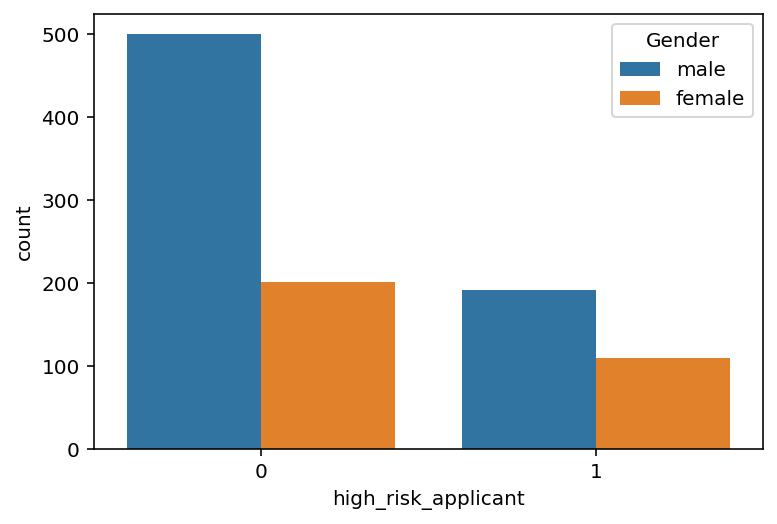

In [203]:
%config InlineBackend.figure_format = 'retina'
sns.countplot(x="high_risk_applicant", hue="Gender", data=df);

### More male in risky candidates in contrast to women

In [204]:
pd.crosstab(df["high_risk_applicant"], df['Primary_applicant_age_in_years'], margins=True)

Primary_applicant_age_in_years,19,20,21,22,23,24,25,26,27,28,...,63,64,65,66,67,68,70,74,75,All
high_risk_applicant,,,,,,,,,,,,,,,,,,,,,
0,1,9,9,16,28,25,22,36,38,28,...,7,5,4,3,3,1,1,3,2,700
1,1,5,5,11,20,19,19,14,13,15,...,1,0,1,2,0,2,0,1,0,300
All,2,14,14,27,48,44,41,50,51,43,...,8,5,5,5,3,3,1,4,2,1000


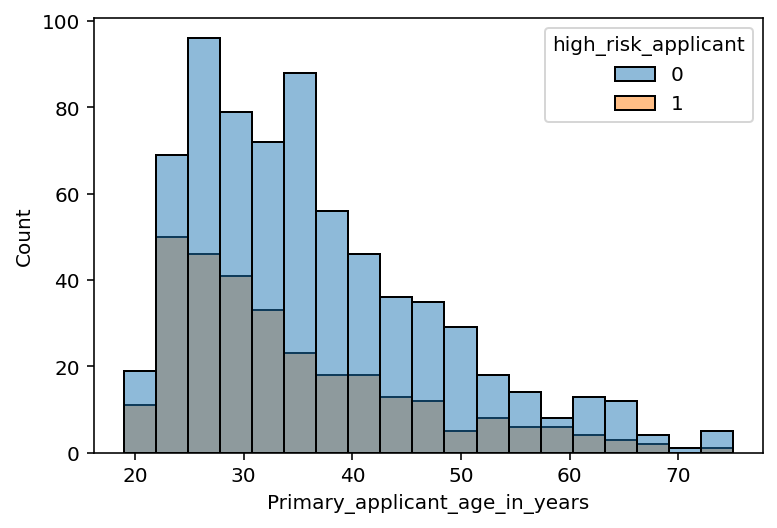

In [205]:
sns.histplot(x="Primary_applicant_age_in_years", hue="high_risk_applicant", data=df);

### By observing the peaks, more youngesters in risky cat

In [206]:
pd.crosstab(df["high_risk_applicant"], df["Marital_status"], margins=True)

Marital_status,divorced/separated,divorced/separated/married,married/widowed,single,All
high_risk_applicant,,,,,
0,30,201,67,402,700
1,20,109,25,146,300
All,50,310,92,548,1000


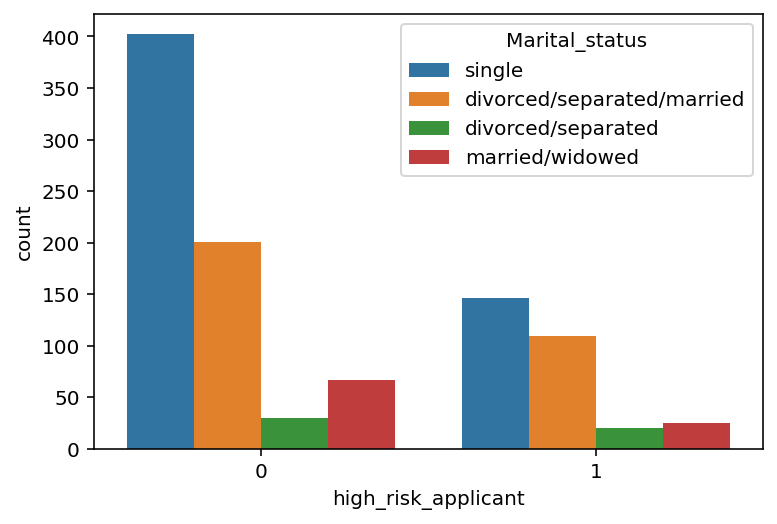

In [207]:
sns.countplot(x="high_risk_applicant", hue="Marital_status", data=df);

### Singles more in risky cat followed by divorved/separated/married, married/widowed and divorced/separated.

In [208]:
pd.crosstab(df["high_risk_applicant"], df["Number_of_dependents"], margins=True)

Number_of_dependents,1,2,All
high_risk_applicant,,,
0,591,109,700
1,254,46,300
All,845,155,1000


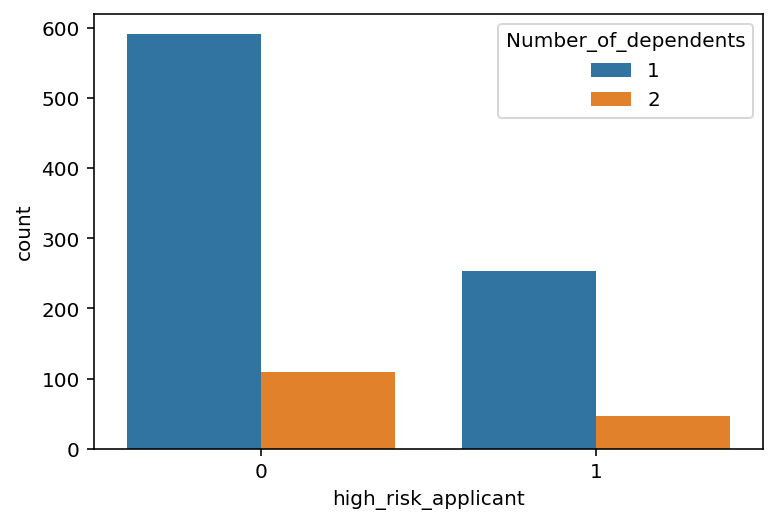

In [209]:
sns.countplot(x="high_risk_applicant", hue="Number_of_dependents", data=df);

### Peopel with 1 number of dependents are more in risky than 2 number of dependents

In [210]:
pd.crosstab(df["high_risk_applicant"], df["Housing"], margins=True)

Housing,for free,own,rent,All
high_risk_applicant,,,,
0,64,527,109,700
1,44,186,70,300
All,108,713,179,1000


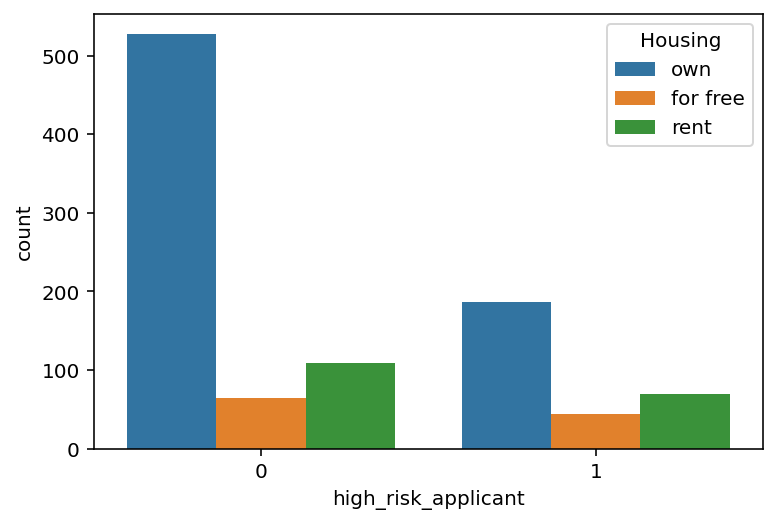

In [211]:
sns.countplot(x="high_risk_applicant", hue="Housing", data=df);

### people owning a house are more in risky cat followed by rent and for free

In [212]:
pd.crosstab(df["high_risk_applicant"], df["Years_at_current_residence"], margins=True)

Years_at_current_residence,1,2,3,4,All
high_risk_applicant,,,,,
0,94,211,106,289,700
1,36,97,43,124,300
All,130,308,149,413,1000


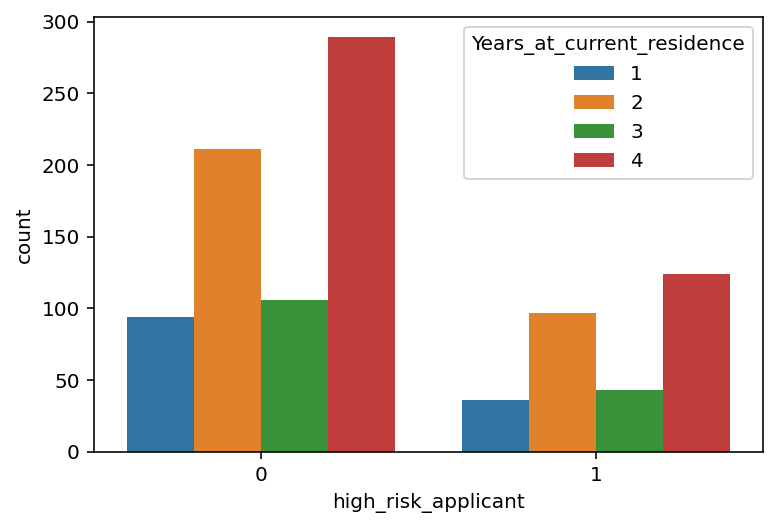

In [213]:
sns.countplot(x="high_risk_applicant", hue="Years_at_current_residence", data=df);

### people living at the residence for 4 years are more in risk cat followed by 2 years,3years and 1 year

In [214]:
pd.crosstab(df["high_risk_applicant"], df["Employment_status"], margins=True)

Employment_status,management / self-employed / highly qualified employee / officer,skilled employee / official,unemployed / unskilled - non-resident,unskilled - resident,All
high_risk_applicant,,,,,
0,97,444,15,144,700
1,51,186,7,56,300
All,148,630,22,200,1000


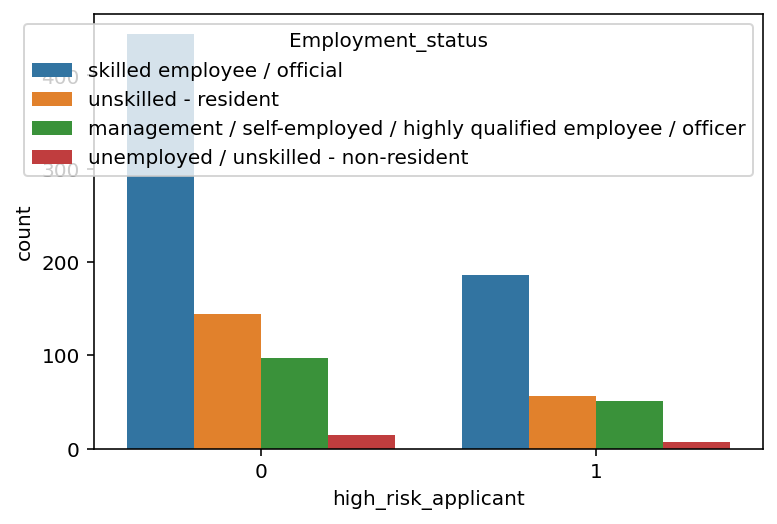

In [215]:
sns.countplot(x="high_risk_applicant", hue="Employment_status", data=df);

### SKilled employee more significantly in risky cat followed by others in order.

In [216]:
pd.crosstab(df["high_risk_applicant"], df["Has_been_employed_for_at_least"], margins=True)

Has_been_employed_for_at_least,0 year,1 year,4 years,7 years,All
high_risk_applicant,,,,,
0,141,235,135,189,700
1,93,104,39,64,300
All,234,339,174,253,1000


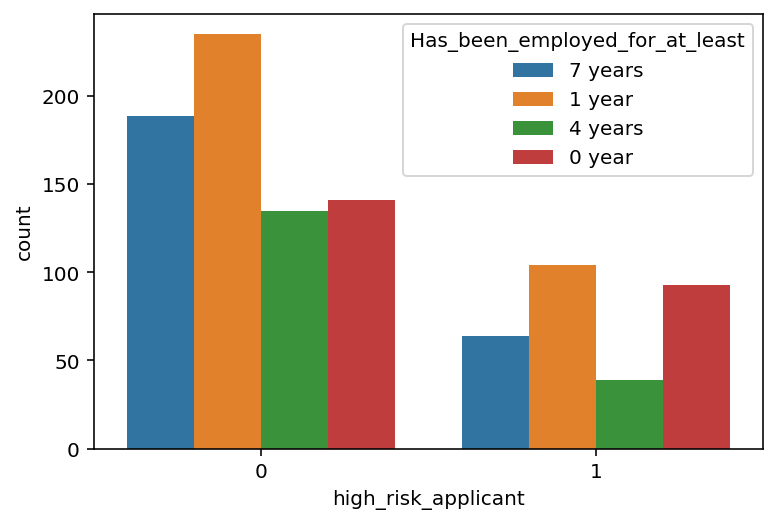

In [217]:
sns.countplot(x="high_risk_applicant", hue="Has_been_employed_for_at_least", data=df);

In [218]:
pd.crosstab(df["high_risk_applicant"], df["Foreign_worker"], margins=True)

Foreign_worker,0,1,All
high_risk_applicant,,,
0,33,667,700
1,4,296,300
All,37,963,1000


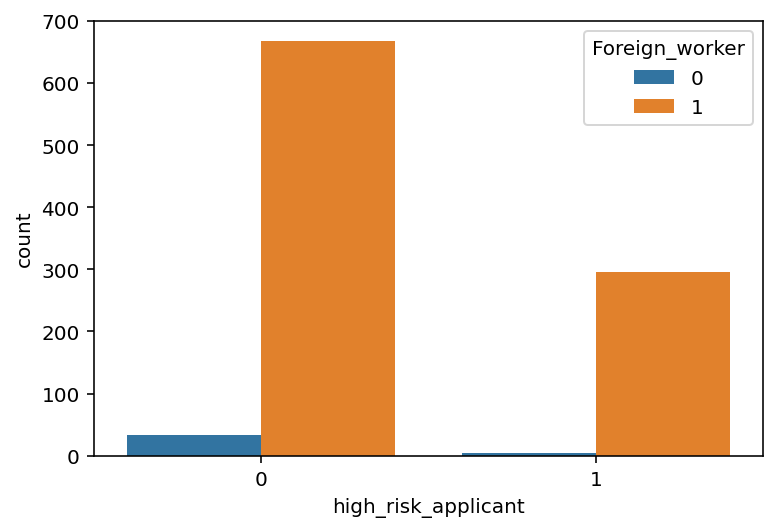

In [219]:
sns.countplot(x="high_risk_applicant", hue="Foreign_worker", data=df);

In [220]:
pd.crosstab(df["high_risk_applicant"], df["Savings_account_balance"], margins=True)

Savings_account_balance,High,Low,Medium,Very high,All
high_risk_applicant,,,,,
0,52,537,69,42,700
1,11,249,34,6,300
All,63,786,103,48,1000


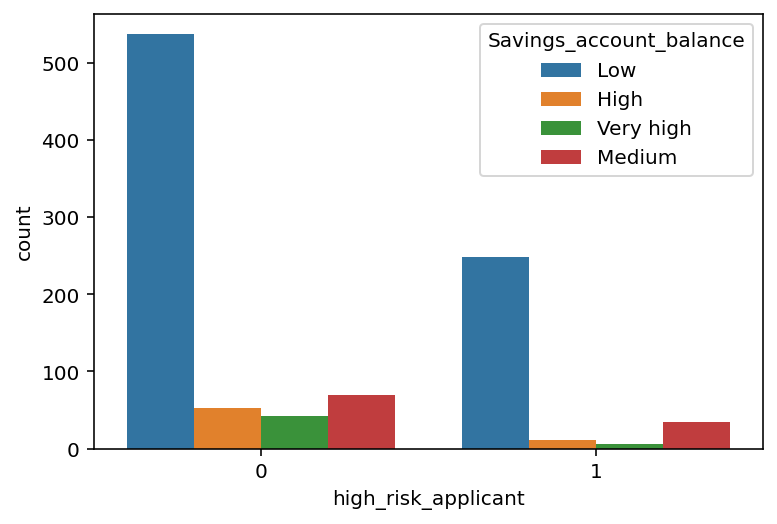

In [221]:
sns.countplot(x="high_risk_applicant", hue="Savings_account_balance", data=df);

In [222]:
pd.crosstab(df["high_risk_applicant"], df["Balance_in_existing_bank_account_(lower_limit_of_bucket)"], margins=True)

Balance_in_existing_bank_account_(lower_limit_of_bucket),0,2 lac,All
high_risk_applicant,,,
0,651,49,700
1,286,14,300
All,937,63,1000


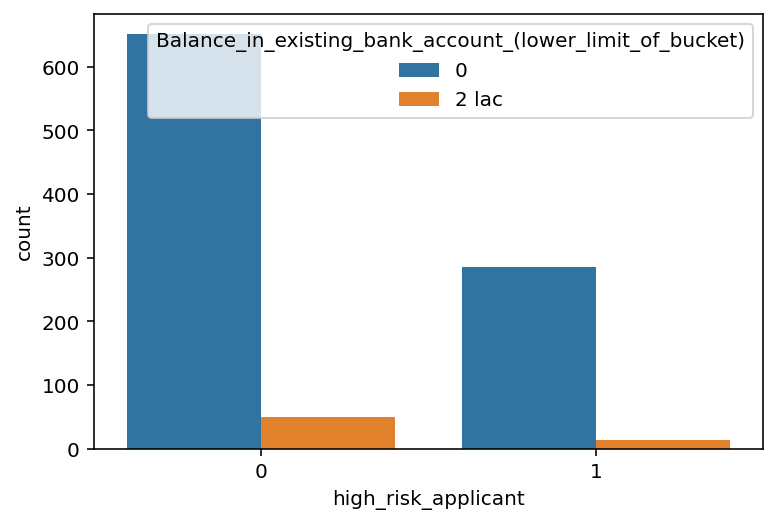

In [223]:
sns.countplot(x="high_risk_applicant", hue="Balance_in_existing_bank_account_(lower_limit_of_bucket)", data=df);

In [224]:
pd.crosstab(df["high_risk_applicant"], df["Balance_in_existing_bank_account_(upper_limit_of_bucket)"], margins=True)

Balance_in_existing_bank_account_(upper_limit_of_bucket),0,2 lac,All
high_risk_applicant,,,
0,536,164,700
1,195,105,300
All,731,269,1000


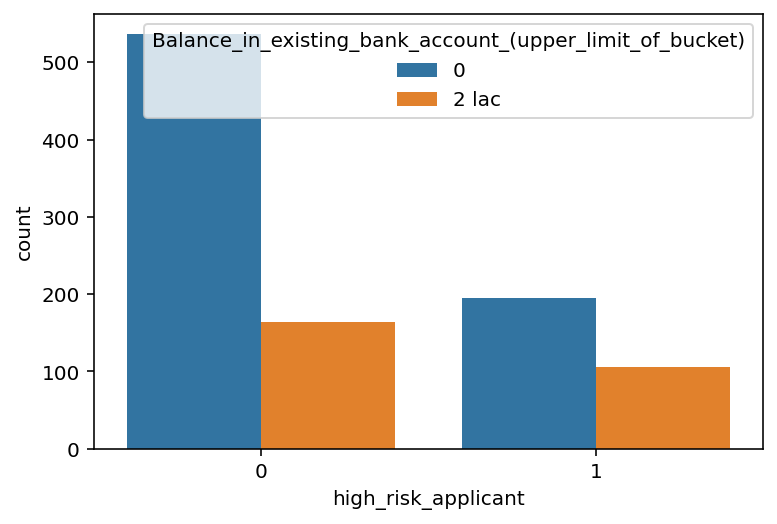

In [225]:
sns.countplot(x="high_risk_applicant", hue="Balance_in_existing_bank_account_(upper_limit_of_bucket)", data=df);

In [226]:
pd.crosstab(df["high_risk_applicant"], df["Months_loan_taken_for"], margins=True)

Months_loan_taken_for,4,5,6,7,8,9,10,11,12,13,...,39,40,42,45,47,48,54,60,72,All
high_risk_applicant,,,,,,,,,,,,,,,,,,,,,
0,6,1,66,5,6,35,25,9,130,4,...,4,0,8,1,1,20,1,7,0,700
1,0,0,9,0,1,14,3,0,49,0,...,1,1,3,4,0,28,1,6,1,300
All,6,1,75,5,7,49,28,9,179,4,...,5,1,11,5,1,48,2,13,1,1000


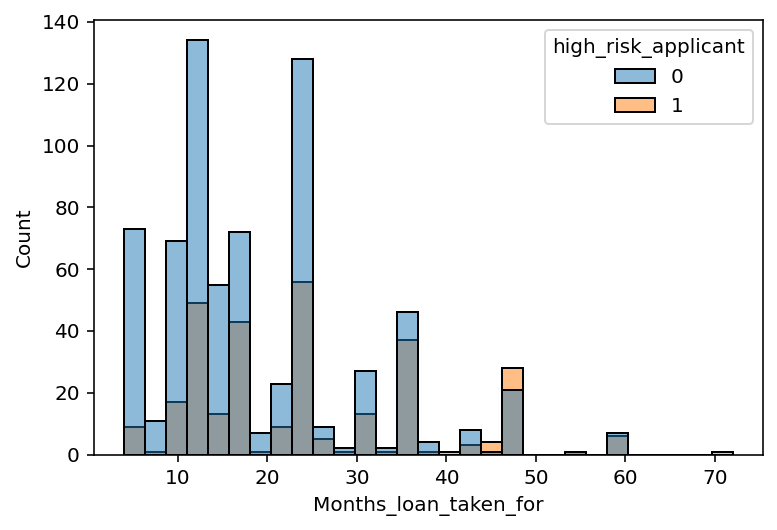

In [227]:
sns.histplot(x="Months_loan_taken_for", hue="high_risk_applicant", data=df);

### Peaks can be observed at around 25,12 and 18 months 

In [228]:
pd.crosstab(df["high_risk_applicant"], df["Purpose"], margins=True)

Purpose,FF&E,business,career development,domestic appliances,education,electronic equipment,new vehicle,repair costs,used vehicle,All
high_risk_applicant,,,,,,,,,,
0,123,63,8,8,28,225,145,14,86,700
1,58,34,1,4,22,67,89,8,17,300
All,181,97,9,12,50,292,234,22,103,1000


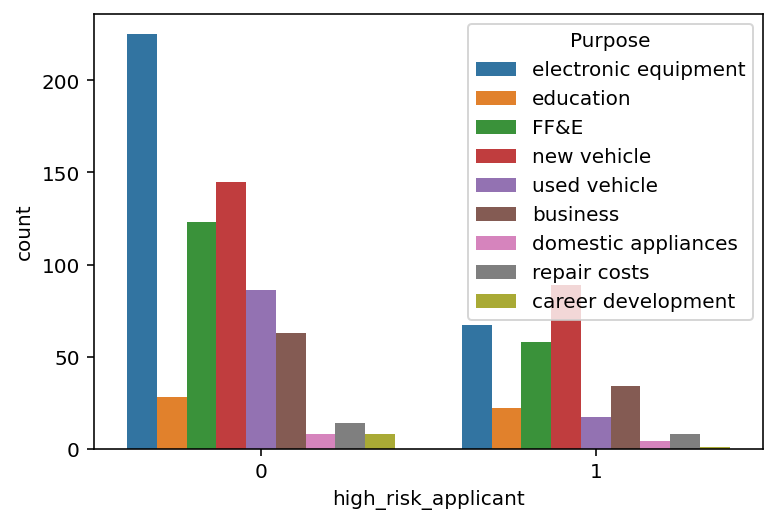

In [229]:
sns.countplot(x="high_risk_applicant", hue="Purpose", data=df);

### high risk at new veichle and electric equipment

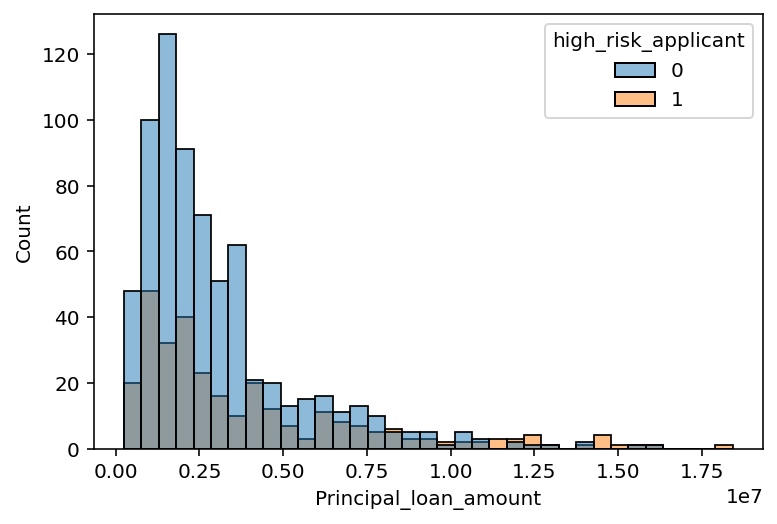

In [230]:
sns.histplot(x="Principal_loan_amount", hue="high_risk_applicant", data=df);

### suprisingly high risk at low principal amount

In [231]:
pd.crosstab(df["high_risk_applicant"], df["EMI_rate_in_percentage_of_disposable_income"], margins=True)

EMI_rate_in_percentage_of_disposable_income,1,2,3,4,All
high_risk_applicant,,,,,
0,102,169,112,317,700
1,34,62,45,159,300
All,136,231,157,476,1000


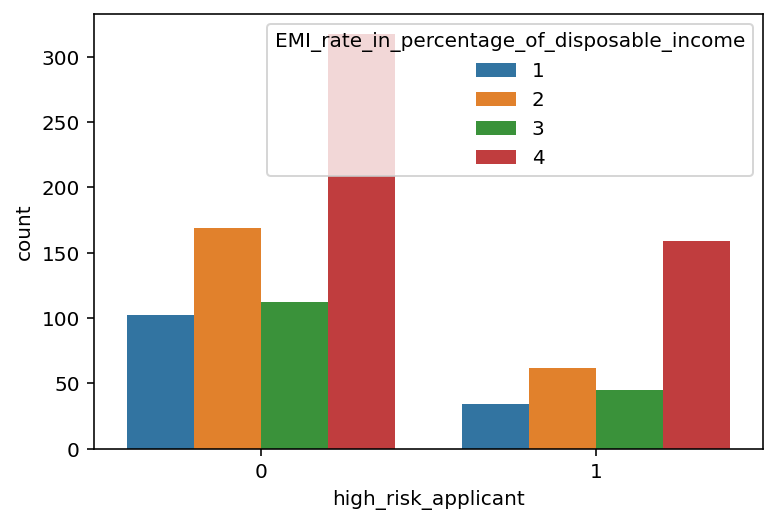

In [232]:
sns.countplot(x="high_risk_applicant", hue="EMI_rate_in_percentage_of_disposable_income", data=df);

### More high risk at more EMI rate

In [233]:
pd.crosstab(df["high_risk_applicant"], df["Property"], margins=True)

Property,building society savings agreement/life insurance,car or other,real estate,All
high_risk_applicant,,,,
0,161,317,222,700
1,71,169,60,300
All,232,486,282,1000


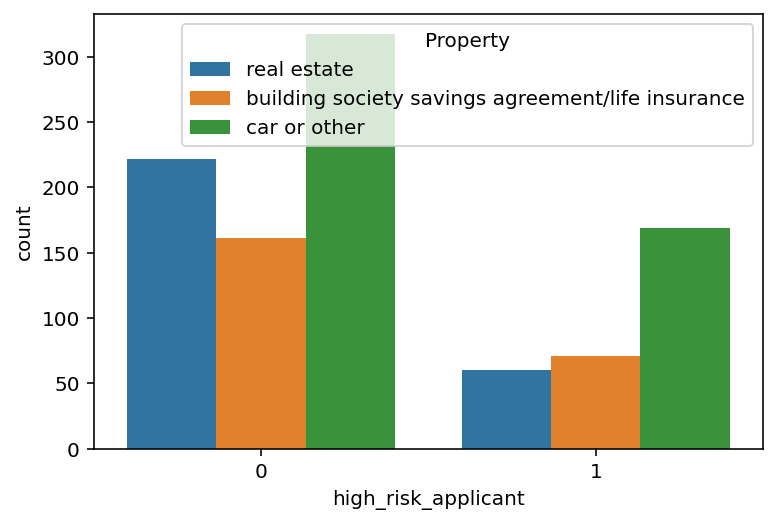

In [234]:
sns.countplot(x="high_risk_applicant", hue="Property", data=df);

### More risk at car and other

In [235]:
pd.crosstab(df["high_risk_applicant"], df["Has_coapplicant"], margins=True)

Has_coapplicant,0,1,All
high_risk_applicant,,,
0,677,23,700
1,282,18,300
All,959,41,1000


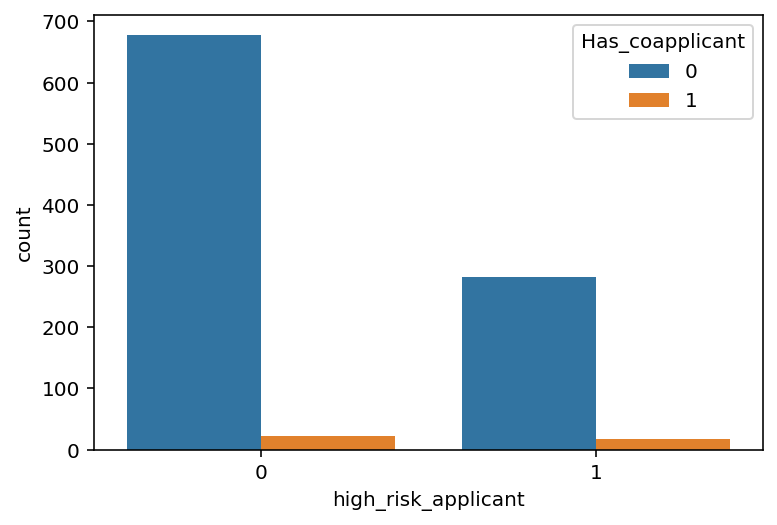

In [236]:
sns.countplot(x="high_risk_applicant", hue="Has_coapplicant", data=df);

### Significat difference can be observed

In [237]:
pd.crosstab(df["high_risk_applicant"], df["Has_guarantor"], margins=True)

Has_guarantor,0,1,All
high_risk_applicant,,,
0,658,42,700
1,290,10,300
All,948,52,1000


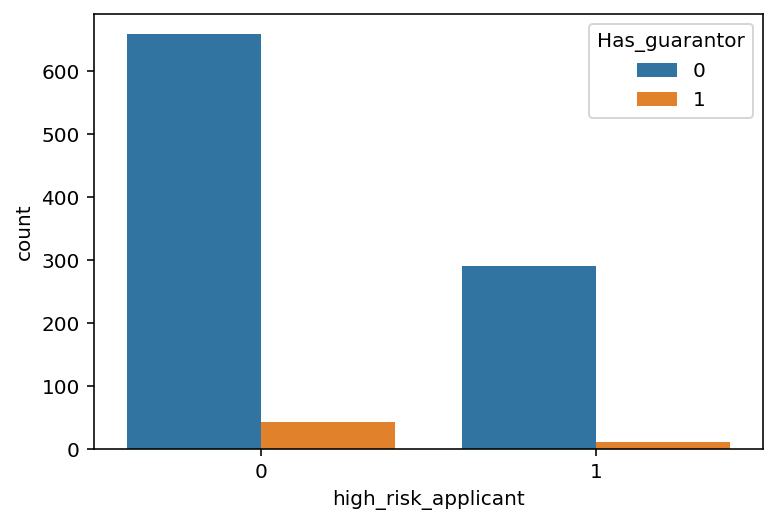

In [238]:
sns.countplot(x="high_risk_applicant", hue="Has_guarantor", data=df);

### similarly significant differnce observed, might be reduced into one dimension later

In [239]:
pd.crosstab(df["high_risk_applicant"], df["Number_of_existing_loans_at_this_bank"], margins=True)

Number_of_existing_loans_at_this_bank,1,2,3,4,All
high_risk_applicant,,,,,
0,433,241,22,4,700
1,200,92,6,2,300
All,633,333,28,6,1000


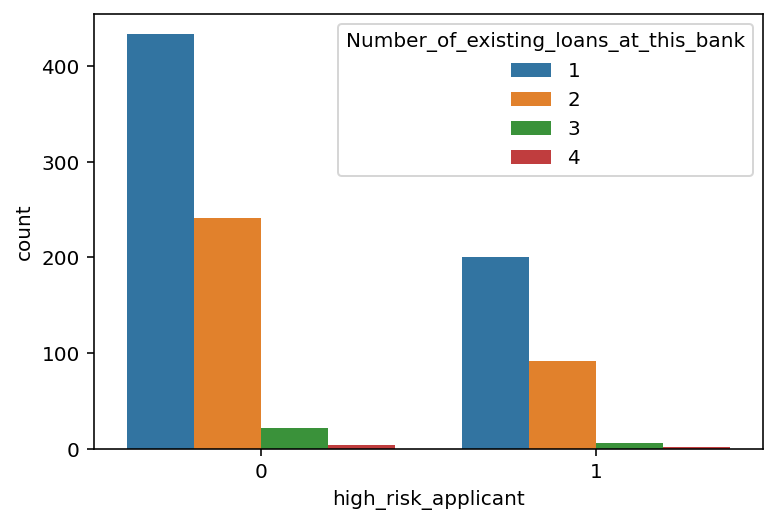

In [240]:
sns.countplot(x="high_risk_applicant", hue="Number_of_existing_loans_at_this_bank", data=df);

### Suprisingly having only 1 existing loan is more dominating than 3 and 4

In [241]:
pd.crosstab(df["high_risk_applicant"], df["Loan_history"], margins=True)

Loan_history,all loans at this bank paid back duly,critical/pending loans at other banks,delay in paying off loans in the past,existing loans paid back duly till now,no loans taken/all loans paid back duly,All
high_risk_applicant,,,,,,
0,21,243,60,361,15,700
1,28,50,28,169,25,300
All,49,293,88,530,40,1000


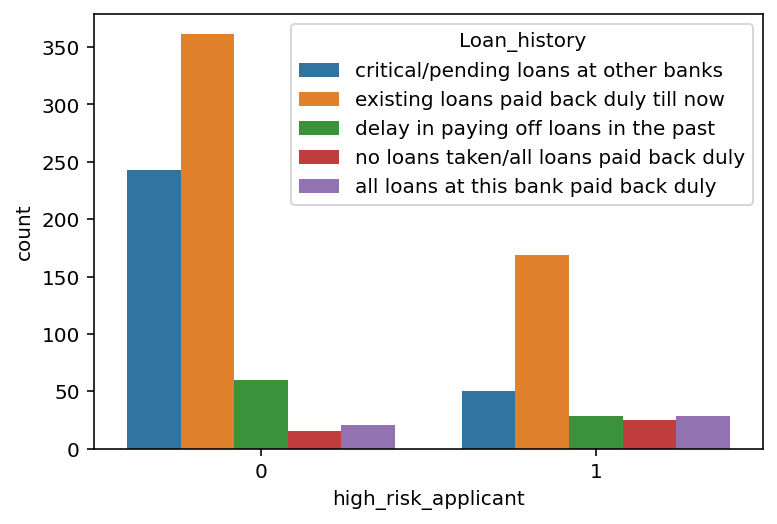

In [242]:
sns.countplot(x="high_risk_applicant", hue="Loan_history", data=df);

In [243]:
df.to_csv('cleaned-data.csv')

In [244]:
aid.to_csv('aid.csv')
## saved for later ref

In [246]:
df.corr()

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
Primary_applicant_age_in_years,1.000000,0.118201,0.266419,0.006151,-0.036136,0.032716,0.058266,-0.018357,-0.023923,0.149254,-0.091127
Number_of_dependents,0.118201,1.000000,0.042643,-0.077071,-0.023834,0.017142,-0.071207,-0.032817,0.036589,0.109667,-0.003015
Years_at_current_residence,0.266419,0.042643,1.000000,0.054097,0.034067,0.028926,0.049302,0.001623,-0.028334,0.089625,0.002967
Foreign_worker,0.006151,-0.077071,0.054097,1.000000,0.138196,0.050050,0.090024,-0.066338,-0.097256,0.009717,0.082079
Months_loan_taken_for,-0.036136,-0.023834,0.034067,0.138196,1.000000,0.624984,0.074749,0.029698,-0.039594,-0.011284,0.214927
Principal_loan_amount,0.032716,0.017142,0.028926,0.050050,0.624984,1.000000,-0.271316,0.079076,-0.065237,0.020795,0.154739
EMI_rate_in_percentage_of_disposable_income,0.058266,-0.071207,0.049302,0.090024,0.074749,-0.271316,1.000000,-0.013048,-0.006429,0.021669,0.072404
Has_coapplicant,-0.018357,-0.032817,0.001623,-0.066338,0.029698,0.079076,-0.013048,1.000000,-0.048426,-0.006001,0.062728
Has_guarantor,-0.023923,0.036589,-0.028334,-0.097256,-0.039594,-0.065237,-0.006429,-0.048426,1.000000,-0.024682,-0.055039
Number_of_existing_loans_at_this_bank,0.149254,0.109667,0.089625,0.009717,-0.011284,0.020795,0.021669,-0.006001,-0.024682,1.000000,-0.045732
